In [2]:
# 1 Importing Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display max columns (watch out for match df over 200K rows)
#pd.set_option('display.max_rows', None)

In [3]:
# 2 Loading Data Sets

champs = df1= pd.read_excel("Data-Sets/Champions-2024.xlsx",).round(1)
match = df2 = pd.read_csv("Data-Sets/lol_match_data.csv",).round(1)


In [4]:
# 2A Champion Details (Can Skip)
# https://www.kaggle.com/datasets/gabkgonzales/league-of-legends-dataset

champs

,Name,Nick Name,Classes,Release Date,Last Changed,Blue Essence,RP,Difficulty,Role,Range type,Resourse type,Base HP,Base mana
0,Aatrox,The darkin blade,Juggernaut,2013-06-13 00:00:00,V14.14,4800,880,Advanced,Top,Melee,Blood Well,650,0
1,Ahri,The nine-tailed fox,Burst,2011-12-14 00:00:00,V14.18,3150,790,Intermediate,Middle,Ranged,Mana,590,418
2,Akali,The rogue assassin,Assassin,2010-05-11 00:00:00,V14.18,3150,790,Expert,"Top,Middle",Melee,Energy,600,200
3,Akshan,The rogue sentinel,Marksman Assassin,2021-07-22 00:00:00,V14.14,4800,880,Intermediate_Plus,Middle,Ranged,Mana,630,350
4,Alistar,The minotaur,Vanguard,2009-02-21 00:00:00,V14.16,1350,585,Novice,Support,Melee,Mana,685,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Zeri,The spark of zaun,Marksman,2022-01-20 00:00:00,V14.18,4800,880,Intermediate_Plus,Bottom,Ranged,Mana,600,250
164,Ziggs,The hexplosives expert,Artillery,2012-02-01 00:00:00,V14.18,4800,880,Novice,"Bottom,Middle",Ranged,Mana,606,480
165,Zilean,The chronokeeper,Specialist,2009-04-18 00:00:00,V13.22,1350,585,Intermediate,Support,Ranged,Mana,574,452
166,Zoe,The aspect of twilight,Burst,2017-11-21 00:00:00,V14.9,4800,880,Expert,Middle,Ranged,Mana,630,425


In [5]:
# 2B Match Data (Can Skip)
# Link - https://www.kaggle.com/datasets/mldatastudent/league-of-legends-match-data (Big File)

match

,match_matchId,match_gameStartTimestamp,match_gameEndTimestamp,match_gameDuration,match_mapId,match_platformId,player_puuid,player_teamId,player_teamPosition,player_lane,...,player_item3_categories,player_item3_priceTotal,player_item4_name,player_item4_description,player_item4_categories,player_item4_priceTotal,player_item5_name,player_item5_description,player_item5_categories,player_item5_priceTotal
0,LA1_1531159804,1.720820e+12,1.720820e+12,1834.0,11.0,LA1,QPstXBo4FWSoly8yTtzmHFjsgtwUJrVzRhFTWlO3irBaEd...,blue,TOP,JUNGLE,...,"['Health', 'Damage', 'CooldownReduction', 'Abi...",3100,Sterak's Gage,<mainText><stats><attention> 400</attention> H...,"['Health', 'Damage', 'Tenacity']",3200,Stealth Ward,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Jungle', 'Lane', 'Trinket', 'Vision']",0
1,LA1_1531159804,1.720820e+12,1.720820e+12,1834.0,11.0,LA1,QzyPH9vc2hbRPURIrgqsSCO433YtjtgkMFE9e1H9_c351N...,blue,JUNGLE,JUNGLE,...,"['Armor', 'Boots']",1000,Sundered Sky,<mainText><stats><attention> 45</attention> At...,"['Health', 'Damage', 'CooldownReduction', 'Abi...",3100,Oracle Lens,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
2,LA1_1531159804,1.720820e+12,1.720820e+12,1834.0,11.0,LA1,YuVhOcfatPV1SXJXC13Rq0WnzmlZOaarfRNj_cq0LPPn4k...,blue,MIDDLE,MIDDLE,...,"['Boots', 'MagicPenetration']",1100,Doran's Ring,<mainText><stats><attention> 18</attention> Ab...,"['Health', 'Lane', 'ManaRegen', 'SpellDamage']",400,Farsight Alteration,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
3,LA1_1531159804,1.720820e+12,1.720820e+12,1834.0,11.0,LA1,MX4cgaNMIE7mc0yui4eWbJiR2oY7NHQiqKyOnZuYaG5_Np...,blue,BOTTOM,BOTTOM,...,"['AttackSpeed', 'Boots']",1100,Statikk Shiv,<mainText><stats><attention> 55</attention> At...,"['Damage', 'AttackSpeed', 'OnHit', 'NonbootsMo...",2800,Farsight Alteration,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
4,LA1_1531159804,1.720820e+12,1.720820e+12,1834.0,11.0,LA1,b3imXxVO7QIdV2svkLrD9KUBxPYFvCQMnIinyVGBz7tbDd...,blue,UTILITY,BOTTOM,...,['Armor'],300,Cloth Armor,<mainText><stats><attention> 15</attention> Ar...,['Armor'],300,Oracle Lens,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205105,KR_7237060555,1.724337e+12,1.724339e+12,1851.0,11.0,KR,v6u_FhRreY-ZLdgHD7dWYBV_IXsb7dqPIPBSbwCKbr0KVJ...,red,TOP,TOP,...,"['AttackSpeed', 'Boots']",1100,Immortal Shieldbow,<mainText><stats><attention> 55</attention> At...,"['Damage', 'CriticalStrike']",3000,Farsight Alteration,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
205106,KR_7237060555,1.724337e+12,1.724339e+12,1851.0,11.0,KR,WFOrSTTv1PTUGVOG5X014vDOlsDSZQlh9Bbn9Jnp3QOfzT...,red,JUNGLE,JUNGLE,...,"['Health', 'SpellDamage']",3000,Rylai's Crystal Scepter,<mainText><stats><attention> 75</attention> Ab...,"['Health', 'SpellDamage', 'Slow']",2600,Oracle Lens,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
205107,KR_7237060555,1.724337e+12,1.724339e+12,1851.0,11.0,KR,htPUrnuZc_NLcd5GTeuWpTzWD47Z_b-xFkmvPPMd63j-24...,red,MIDDLE,MIDDLE,...,"['Health', 'Damage', 'SpellVamp', 'Lane']",450,Bloodthirster,<mainText><stats><attention> 80</attention> At...,"['Damage', 'LifeSteal']",3400,Oracle Lens,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
205108,KR_7237060555,1.724337e+12,1.724339e+12,1851.0,11.0,KR,qqUpt5aAAcx450pGLlbZTK6PSRRBeG1FwUbF-wrHYlnD3P...,red,BOTTOM,BOTTOM,...,"['Health', 'Armor', 'Aura', 'AbilityHaste']",2700,"Jak'Sho, The Protean",<mainText><stats><attention> 300</attention> H...,"['Health', 'SpellBlock', 'Armor', 'MagicResist']",3200,Farsight Alteration,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0


In [6]:
# 3 Majors Changes to Match DF

# Count the occurrences for each value in 'Difficulty'
champ_difficulty_count = champs['Difficulty'].value_counts()

# Assigning Difficulty levels based on 1-6
champs['Difficulty'] = champs['Difficulty'].replace({'Beginner' : '1',
                                                     'Novice' : '2',
                                                     'Intermediate' : '3',
                                                     'Intermediate_Plus' : '4',
                                                     'Advanced' : '5',
                                                     'Expert' : '6',
                                                     })

# Count Difficulity Levels (1-6)
champ_difficulty_count = champs['Difficulty'].value_counts()

# Display df
print(champ_difficulty_count)

# Dropping unneccessary columns
champs.drop(['Nick Name',  
             'Range type', 
             'Resourse type', 
             'Base HP', 
             'Base mana',
             'Classes'], axis=1, inplace=True)

# Slicing secondary roles from Role column
champs['Role'] = champs['Role'].str.split(',').str[0]

# Sliced 'Release Date' to remove HH:MM:SS
champs['Release Date'] = pd.to_datetime(champs['Release Date'], errors='coerce')

champs['Release Date'] = pd.to_datetime(champs['Release Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Reformat 'Release Date' to MM/DD/YYYY format
champs['Release Date'] = champs['Release Date'].dt.strftime('%m/%d/%Y')

# Rearranging champs df 
champs = champs[['Name', 
               'Role', 
               'Difficulty',
               'Release Date', 
               'Last Changed', 
               'RP', 
               'Blue Essence',]]

# Replace mis-match names with punctation within name or spaces needed
champs['Name'] = champs['Name'].replace({'Dr. mundo': "Dr. Mundo",
                                               'Chogath' : "Cho'Gath",
                                               'Dr. mundo' : 'Dr. Mundo',
                                               'Jarvan Iv' : 'Jarvan IV',
                                               "KSante" : "K'Sante",
                                               "Kaisa" : "Kai'Sa",
                                               'Khazix' : "Kha'Zix",
                                               'KogMaw' : "Kog'Maw",
                                               'LeeSin' : "Lee Sin",
                                               'MasterYi' : 'Master Yi ',
                                               'MissFortune' : 'Miss Fortune ',
                                               'Nunu' : 'Nunu & Willump',
                                               'RekSai' : "Rek'Sai",
                                               'Renata' : 'Renata Glasc',
                                               'TahmKench' : 'Tahm Kench ',
                                               'TwistedFate' : 'Twisted Fate',
                                               'Velkoz' : "Vel'Koz",
                                               'MonkeyKing' : 'Wukong',
                                               'XinZhao' : 'Xin Zhao'})

blue_essence_count = champs['Blue Essence'].value_counts()

champs_rp_count = champs['RP'].value_counts

# Count the occurrences for each value in 'Blue Essence' and 'RP'

blue_essence_count = champs['Blue Essence'].value_counts()

champs_rp_count = champs['RP'].value_counts()

# Display the results

print(blue_essence_count)

print(champs_rp_count)

champs

Difficulty
2    43
3    38
1    29
4    28
5    15
6    15
Name: count, dtype: int64
Blue Essence
4800    59
3150    47
1350    31
450     23
6300     5
7800     1
4444     1
3141     1
Name: count, dtype: int64
RP
880    57
790    47
585    32
260    26
975     6
Name: count, dtype: int64


,Name,Role,Difficulty,Release Date,Last Changed,RP,Blue Essence
0,Aatrox,Top,5,06/13/2013,V14.14,880,4800
1,Ahri,Middle,3,12/14/2011,V14.18,790,3150
2,Akali,Top,6,05/11/2010,V14.18,790,3150
3,Akshan,Middle,4,07/22/2021,V14.14,880,4800
4,Alistar,Support,2,02/21/2009,V14.16,585,1350
...,...,...,...,...,...,...,...
163,Zeri,Bottom,4,01/20/2022,V14.18,880,4800
164,Ziggs,Bottom,2,02/01/2012,V14.18,880,4800
165,Zilean,Support,3,04/18/2009,V13.22,585,1350
166,Zoe,Middle,6,11/21/2017,V14.9,880,4800


In [7]:
# 4 Cleaning / Removing unwanted columns for match df
# Dropping 99 columns retaining 9 columns from match df

match = df2[['player_teamPosition',
            'player_champName',
            'player_champName_ban',
            'player_kills', 
            'player_deaths', 
            'player_assists',
            'player_kda',
            'player_totalMinionsKilled', 
            'player_gameLength',]]

match

# 5 Creating copy of match(df)
match = match.copy()

# 5A Rename match columns to make key 'Name' for df merge (see #7)
match.rename(columns={'player_teamPosition' : 'Position', 
                     'player_champName' : 'Name', 
                     'player_champName_ban' : 'Banned Champ',
                     'player_kills' : 'Kills',
                     'player_deaths' : 'Deaths', 
                     'player_assists' : 'Assist', 
                     'player_kda' : 'KDA',
                     'player_totalMinionsKilled' : 'CS', 
                     'player_gameLength' : "Game Time (s)",}, inplace=True)

# Replace mis-match names with punctation within name or spaces needed
match['Name'] = match['Name'].replace({'AurelionSol': 'Aurelion Sol', 
                                               'Belveth': "Bel'veth",
                                               'Chogath' : "Cho'gath",
                                               'DrMundo' : 'Dr. Mundo',
                                               'JarvanIV' : 'Jarvan IV',
                                               "KSante" : "K'sante",
                                               "Kaisa" : "Kai'sa",
                                               'Khazix' : "Kha'zix",
                                               "Kogmaw" : "Kog'maw",
                                               'LeeSin' : "Lee Sin",
                                               'MasterYi ' : 'Master Yi',
                                               'MissFortune ' : 'Miss Fortune' ,
                                               'Nunu' : 'Nunu & Willump',
                                               "Rek'Sai" : "Rek'sai",
                                               'Renata' : 'Renata Glasc',
                                               'TahmKench ' : 'Tahm Kench' ,
                                               'TwistedFate' : 'Twisted Fate',
                                               'Velkoz' : "Vel'koz",
                                               'MonkeyKing' : 'Wukong',
                                               'XinZhao' : 'Xin Zhao',})



# Display the modified DataFrame
print(match)

       Position        Name  Banned Champ  Kills  Deaths  Assist  KDA     CS  \
0           TOP         Jax         Fiora   14.0     4.0     5.0  4.8  210.0   
1        JUNGLE    Xin Zhao  Fiddlesticks    2.0     4.0    17.0  4.8   18.0   
2        MIDDLE       Neeko      Volibear    2.0     6.0    16.0  3.0  184.0   
3        BOTTOM      Kai'sa          Pyke   19.0     7.0    10.0  4.1  229.0   
4       UTILITY  Blitzcrank           Lux    2.0     5.0    24.0  5.2   34.0   
...         ...         ...           ...    ...     ...     ...  ...    ...   
205105      TOP        Zeri           NaN   19.0     8.0     7.0  3.2  254.0   
205106   JUNGLE        Zyra       Karthus    7.0     7.0    15.0  3.1   85.0   
205107   MIDDLE    Tristana           NaN    6.0     7.0     7.0  1.9  262.0   
205108   BOTTOM        Ornn       Smolder    3.0     9.0    15.0  2.0  120.0   
205109  UTILITY       Senna        Lillia    9.0     7.0    22.0  4.4   36.0   

        Game Time (s)  
0              

In [8]:
champs['Name'] = champs['Name'].replace({'Master Yi ': 'Master Yi', 
                                               'Miss Fortune ': "Miss Fortune",
                                               'Tahm Kench ' : "Tahm Kench",})

In [9]:
# Move to above column after testing

# Replace specific values in a column
match['Position'] = match['Position'].replace({'TOP': 'Top',
                                    'MIDDLE': 'Middle',
                                    'JUNGLE' : 'Jungle',
                                    'BOTTOM' : 'Bottom',
                                    'UTILITY' : 'Support'})

match

,Position,Name,Banned Champ,Kills,Deaths,Assist,KDA,CS,Game Time (s)
0,Top,Jax,Fiora,14.0,4.0,5.0,4.8,210.0,1835.0
1,Jungle,Xin Zhao,Fiddlesticks,2.0,4.0,17.0,4.8,18.0,1835.0
2,Middle,Neeko,Volibear,2.0,6.0,16.0,3.0,184.0,1835.0
3,Bottom,Kai'sa,Pyke,19.0,7.0,10.0,4.1,229.0,1835.0
4,Support,Blitzcrank,Lux,2.0,5.0,24.0,5.2,34.0,1835.0
...,...,...,...,...,...,...,...,...,...
205105,Top,Zeri,NaN,19.0,8.0,7.0,3.2,254.0,1851.8
205106,Jungle,Zyra,Karthus,7.0,7.0,15.0,3.1,85.0,1851.8
205107,Middle,Tristana,NaN,6.0,7.0,7.0,1.9,262.0,1851.8
205108,Bottom,Ornn,Smolder,3.0,9.0,15.0,2.0,120.0,1851.8


In [10]:
# Get the count of each champion picked (based on 'Name' column)
match_champ_count = match['Name'].value_counts()

# Display the results

match_champ_count


Name
Ezreal          6897
Kai'sa          6729
Zeri            5586
Leona           4326
Rell            3934
                ... 
Vel'koz          180
Singed           169
Heimerdinger     163
Trundle          131
Yorick            83
Name: count, Length: 168, dtype: int64

In [11]:
# 6 Sort by Position and then by the desired column, if needed
match_sorted = match.sort_values(by=['Position'])

# Display the sorted dataframe
match_sorted

# Name sort to pick up NaN values for Positions
name_sorted = match.sort_values(by=['Name'])

name_sorted

,Position,Name,Banned Champ,Kills,Deaths,Assist,KDA,CS,Game Time (s)
49610,Top,Aatrox,LeBlanc,7.0,10.0,6.0,1.3,219.0,2104.9
12645,Top,Aatrox,Nautilus,3.0,9.0,3.0,0.7,276.0,2385.6
167025,Top,Aatrox,Aurora,0.0,7.0,1.0,0.1,87.0,912.4
179200,Top,Aatrox,Hecarim,10.0,4.0,2.0,3.0,192.0,1285.2
167010,Top,Aatrox,Leona,12.0,10.0,3.0,1.5,106.0,1319.7
...,...,...,...,...,...,...,...,...,...
137651,Jungle,Zyra,LeBlanc,0.0,1.0,0.0,0.0,0.0,353.8
20681,Jungle,Zyra,LeBlanc,0.0,4.0,3.0,0.8,9.0,920.9
107355,Jungle,Zyra,Ezreal,1.0,5.0,10.0,2.2,8.0,1111.6
42736,Jungle,Zyra,NaN,6.0,2.0,16.0,11.0,31.0,1437.5


In [12]:

# 7 Merge Sorted Lanes and Champ information
# change how type from left to right
merged_df = pd.merge(match_sorted, champs, on='Name', how='left')

# Merge Sorted Names and Champ information (picked up NaN values not in 'merged df')
name_df = pd.merge(match_sorted, champs, on='Name', how='left')


In [13]:
# Groupby 'Name' Column and count the number of times each champ has been played
merged_df_count = merged_df.groupby('Name').agg(
    Count=('Name', 'count'),
    Kills=('Kills', 'sum'),
    Deaths=('Deaths', 'sum'),
    Assist=('Assist', 'sum'),
    Game_Time=('Game Time (s)', 'sum')
)

# Function to convert total seconds to DD:HH:MM:SS format
def seconds_to_dhms(seconds):
    days = seconds // 86400  # 86400 seconds in a day
    hours = (seconds % 86400) // 3600  # 3600 seconds in an hour
    minutes = (seconds % 3600) // 60  # 60 seconds in a minute
    sec = seconds % 60  # Remaining seconds
    
    # Return formatted string in DD:HH:MM:SS
    return f"{int(days)}d {int(hours):02d}h {int(minutes):02d}m {int(sec):02d}s"

# Apply function to the 'Game_Time' column
merged_df_count['Game_Time'] = merged_df_count['Game_Time'].apply(seconds_to_dhms)

# Display updated dataframe
print(merged_df_count)


         Count    Kills   Deaths   Assist        Game_Time
Name                                                      
Aatrox    2105   9578.0  11049.0   9878.0  36d 16h 00m 44s
Ahri      1067   5519.0   4490.0   7625.0  18d 09h 24m 07s
Akali     1313   8391.0   6598.0   5473.0  22d 21h 24m 20s
Akshan     744   5405.0   3546.0   4170.0  13d 01h 54m 02s
Alistar   2379   3249.0  12779.0  31298.0  40d 20h 15m 39s
...        ...      ...      ...      ...              ...
Zeri      5586  35807.0  26942.0  33032.0  96d 10h 49m 43s
Ziggs      747   3610.0   3388.0   5094.0  12d 23h 31m 43s
Zilean     383    661.0   1644.0   4501.0   6d 19h 48m 02s
Zoe        591   3713.0   2671.0   4411.0  10d 12h 40m 08s
Zyra      1650   7545.0   7683.0  15138.0  29d 04h 15m 09s

[168 rows x 5 columns]


In [14]:
# Testing
test_time = merged_df_count.loc['Zoe', 'Game_Time']

In [15]:
# Testing
test_time

'10d 12h 40m 08s'

In [16]:
#pd.set_option('display.max_rows', None)

# 8 Groupby 'Name' Column and count each time a champ has been played
merged_df_count = merged_df.groupby('Name').agg(Count=('Name', 'count'))

# Display # of times a champ has been played
print(merged_df_count)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
# Convert Game_Time to HH:MM:SS formart

merged_df_count = merged_df.groupby('Name').agg(Count=('Name', 'count'), 
                                        Kills=('Kills', 'sum'), 
                                        Deaths=('Deaths', 'sum'),
                                        Assist=('Assist', 'sum'),
                                        Game_Time=('Game Time (s)', 'sum'))

merged_df_count

         Count
Name          
Aatrox    2105
Ahri      1067
Akali     1313
Akshan     744
Alistar   2379
...        ...
Zeri      5586
Ziggs      747
Zilean     383
Zoe        591
Zyra      1650

[168 rows x 1 columns]


,Count,Kills,Deaths,Assist,Game_Time
Name,,,,,
Aatrox,2105,9578.0,11049.0,9878.0,3168044.2
Ahri,1067,5519.0,4490.0,7625.0,1589047.3
Akali,1313,8391.0,6598.0,5473.0,1977860.7
Akshan,744,5405.0,3546.0,4170.0,1130042.6
Alistar,2379,3249.0,12779.0,31298.0,3528939.4
...,...,...,...,...,...
Zeri,5586,35807.0,26942.0,33032.0,8333383.4
Ziggs,747,3610.0,3388.0,5094.0,1121503.4
Zilean,383,661.0,1644.0,4501.0,589682.7


In [17]:
#df.set_option('display.max_rows', None)

# 9 Groupby 'Banned Champ' column and count each time a champ has been banned
merged_df_banned_count = merged_df.groupby('Banned Champ').agg(Count=('Name', 'count'))

# Sort to get top 50 banned champs
top50_merged_banned = merged_df_banned_count.sort_values('Count', ascending=False)#.head(50)

# Reset index to make 'Banned Champ' a column
top50_merged_banned = top50_merged_banned.reset_index()

# Rename the columns to 'Name' and 'Count'
top50_merged_banned = top50_merged_banned.rename(columns={'Banned Champ': 'Name'})

# Display the result
top50_merged_banned

# Attach lane 
top50_merged_banned = pd.merge(top50_merged_banned, champs, on='Name', how='right')

# Dropping all columns but Name, Count, and Role
top50_merged_banned = top50_merged_banned[['Name',
                                           'Count',
                                           'Role',]]
# Top 50
top50_merged_banned.head(50)



,Name,Count,Role
0,Aatrox,1130.0,Top
1,Ahri,468.0,Middle
2,Akali,1251.0,Top
3,Akshan,1806.0,Middle
4,Alistar,672.0,Support
5,Amumu,185.0,Jungle
6,Anivia,189.0,Middle
7,Annie,68.0,Middle
8,Aphelios,201.0,Bottom
9,Ashe,3981.0,Bottom


In [18]:
merged_df_count['Game_Time'] = pd.to_numeric(merged_df_count['Game_Time'], errors='coerce')


merged_df_count['Game_Time'] = merged_df_count['Game_Time'].apply(
    lambda x: str(int(x // 86400)) + 'd ' + 
              str(int((x % 86400) // 3600)).zfill(2) + 'h ' + 
              str(int((x % 3600) // 60)).zfill(2) + 'm ' + 
              str(int(x % 60)).zfill(2) + 's' if pd.notna(x) else 'NaN'
)


merged_df_count.rename(columns={
    'Kills': 'Kills(Total)', 
    'Deaths': 'Deaths(Total)', 
    'Assist': 'Assist(Total)',
    'Game_Time': 'Game_Time(Total)', 
}, inplace=True)

# Display the result
print(merged_df_count)


         Count  Kills(Total)  Deaths(Total)  Assist(Total) Game_Time(Total)
Name                                                                       
Aatrox    2105        9578.0        11049.0         9878.0  36d 16h 00m 44s
Ahri      1067        5519.0         4490.0         7625.0  18d 09h 24m 07s
Akali     1313        8391.0         6598.0         5473.0  22d 21h 24m 20s
Akshan     744        5405.0         3546.0         4170.0  13d 01h 54m 02s
Alistar   2379        3249.0        12779.0        31298.0  40d 20h 15m 39s
...        ...           ...            ...            ...              ...
Zeri      5586       35807.0        26942.0        33032.0  96d 10h 49m 43s
Ziggs      747        3610.0         3388.0         5094.0  12d 23h 31m 43s
Zilean     383         661.0         1644.0         4501.0   6d 19h 48m 02s
Zoe        591        3713.0         2671.0         4411.0  10d 12h 40m 08s
Zyra      1650        7545.0         7683.0        15138.0  29d 04h 15m 09s

[168 rows x

In [19]:
# 11 Groupby 'Name' Column and count each time a champ has been played
merged_df_mean = merged_df.groupby('Name').agg(Count=('Kills', 'count'))

# Display # of times a champ has been played
print(merged_df_mean)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
merged_df_mean = merged_df.groupby('Name').agg(Kills=('Kills', 'mean'), 
                                        Deaths=('Deaths', 'mean'),
                                        Assist=('Assist', 'mean'),
                                        KDA=('KDA', 'mean'),
                                        Game_Time=('Game Time (s)', 'mean'))

merged_df_mean.round(1)

merged_df_mean.rename(columns={
    'Kills': 'Kills(Mean)', 
    'Deaths': 'Deaths(Mean)', 
    'Assist': 'Assist(Mean)',
    'Game_Time': 'Game_Time(Mean)',
    'KDA' : 'KDA(Mean)' 
}, inplace=True)

         Count
Name          
Aatrox    2105
Ahri      1067
Akali     1313
Akshan     744
Alistar   2379
...        ...
Zeri      5586
Ziggs      747
Zilean     383
Zoe        591
Zyra      1650

[168 rows x 1 columns]


In [20]:
# 13 Merge Sorted Lanes and Champ information
merged_count_mean = pd.merge(merged_df_count, merged_df_mean, on='Name', how='left')

# Convert 'Game_Time(Mean)' to MM:SS format
merged_count_mean['Game_Time(Mean)'] = merged_count_mean['Game_Time(Mean)'].apply(
    lambda x: str(int(x // 60)).zfill(2) + 'm ' + 
              str(int(x % 60)).zfill(2) + 's' if pd.notna(x) else 'NaN')

# Display the merged DataFrame
merged_count_mean


,Count,Kills(Total),Deaths(Total),Assist(Total),Game_Time(Total),Kills(Mean),Deaths(Mean),Assist(Mean),KDA(Mean),Game_Time(Mean)
Name,,,,,,,,,,
Aatrox,2105,9578.0,11049.0,9878.0,36d 16h 00m 44s,4.550119,5.248931,4.692637,2.495439,25m 05s
Ahri,1067,5519.0,4490.0,7625.0,18d 09h 24m 07s,5.172446,4.208060,7.146204,4.113590,24m 49s
Akali,1313,8391.0,6598.0,5473.0,22d 21h 24m 20s,6.390708,5.025133,4.168317,2.937700,25m 06s
Akshan,744,5405.0,3546.0,4170.0,13d 01h 54m 02s,7.264785,4.766129,5.604839,3.864785,25m 18s
Alistar,2379,3249.0,12779.0,31298.0,40d 20h 15m 39s,1.365700,5.371585,13.155948,3.878142,24m 43s
...,...,...,...,...,...,...,...,...,...,...
Zeri,5586,35807.0,26942.0,33032.0,96d 10h 49m 43s,6.410132,4.823129,5.913355,3.702166,24m 51s
Ziggs,747,3610.0,3388.0,5094.0,12d 23h 31m 43s,4.832664,4.535475,6.819277,3.656359,25m 01s
Zilean,383,661.0,1644.0,4501.0,6d 19h 48m 02s,1.725849,4.292428,11.751958,4.667363,25m 39s


In [21]:
# 14 Rearranging Total & Average Dataframe
# fix 'Game_Time(Mean)'
merged_count_mean = merged_count_mean[['Kills(Total)','Kills(Total)', 'Deaths(Total)', 'Deaths(Total)', 'Assist(Total)', 'Assist(Mean)', 'KDA(Mean)', 'Game_Time(Mean)']]#removed(mean)

# KDA Leader (Mean)
kda_kill_leaders = merged_count_mean.sort_values('KDA(Mean)', ascending=False)

# KDA Leaders (Mean)
kda_kill_leaders

,Kills(Total),Kills(Total),Deaths(Total),Deaths(Total),Assist(Total),Assist(Mean),KDA(Mean),Game_Time(Mean)
Name,,,,,,,,
Yuumi,559.0,559.0,1567.0,1567.0,6328.0,13.492537,6.627719,24m 09s
Ivern,1588.0,1588.0,2399.0,2399.0,8532.0,12.658754,6.444659,24m 39s
Jarvan IV,5389.0,5389.0,5004.0,5004.0,11884.0,11.383142,5.300958,25m 01s
Nidalee,21556.0,21556.0,13477.0,13477.0,25342.0,7.961671,5.289947,24m 29s
Janna,1826.0,1826.0,5342.0,5342.0,17401.0,13.385385,5.221615,25m 07s
...,...,...,...,...,...,...,...,...
Irelia,7698.0,7698.0,8536.0,8536.0,5852.0,4.350929,2.190335,25m 03s
Mordekaiser,1672.0,1672.0,2073.0,2073.0,1494.0,3.860465,2.121705,24m 30s
Trundle,440.0,440.0,658.0,658.0,536.0,4.091603,2.100000,24m 09s


In [22]:
# 15 Sort Values by highest (Count) "Kills, Deaths, Assist, etc"

# Kills
merged_kills_count = merged_df_count.sort_values(by='Kills(Total)', ascending=False)

# Deaths
merged_deaths_count = merged_df_count.sort_values(by='Deaths(Total)', ascending=False)

# Assist
merged_assist_count = merged_df_count.sort_values(by='Assist(Total)', ascending=False)


In [23]:
# 16 Sort Values by highest (Mean)"Kills, Deaths, Assist, etc"

# Kills
merged_kills_mean = merged_df_mean.sort_values(by='Kills(Mean)', ascending=False)

# Deaths
merged_deaths_mean = merged_df_mean.sort_values(by='Deaths(Mean)', ascending=False)

# Assist
merged_assist_mean = merged_df_mean.sort_values(by='Assist(Mean)', ascending=False)

In [24]:
# 17 Top Data Frame

TOP = merged_df[merged_df['Position'].isin(['Top'])]

TOP


,Position,Name,Banned Champ,Kills,Deaths,Assist,KDA,CS,Game Time (s),Role,Difficulty,Release Date,Last Changed,RP,Blue Essence
164021,Top,Nasus,Kayn,1.0,2.0,0.0,0.5,93.0,911.3,Top,1,10/01/2009,V14.18,585.0,1350.0
164022,Top,Gnar,Zeri,4.0,0.0,1.0,5.0,159.0,957.4,Top,4,08/14/2014,V14.18,880.0,4800.0
164023,Top,Bard,Fiora,2.0,5.0,23.0,5.0,194.0,2223.1,Support,5,03/12/2015,V14.15,880.0,4800.0
164024,Top,Twisted Fate,Graves,5.0,7.0,2.0,1.0,184.0,1523.3,Middle,3,02/21/2009,V14.12,585.0,4800.0
164025,Top,Pantheon,Hecarim,3.0,5.0,6.0,1.8,191.0,1648.7,Top,2,02/02/2010,V14.13,585.0,1350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205019,Top,Jayce,Akshan,3.0,13.0,8.0,0.8,183.0,1856.3,Top,4,07/07/2012,V14.18,880.0,4800.0
205020,Top,Tryndamere,Vi,4.0,1.0,1.0,5.0,129.0,918.1,Top,2,05/01/2009,V14.12,585.0,1350.0
205021,Top,Cassiopeia,Akshan,1.0,6.0,14.0,2.5,171.0,1841.3,Middle,3,12/14/2010,V14.16,880.0,4800.0
205022,Top,TahmKench,Ezreal,1.0,6.0,1.0,0.3,125.0,1451.8,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# 18 Groupby 'Name' Column and count each time a champ has been played
top_count = TOP.groupby('Name').agg(Count=('Kills', 'count'))

# Display # of times a champ has been played
print(top_count)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
top_count = TOP.groupby('Name').agg(Kills=('Kills', 'sum'), 
                                        Deaths=('Deaths', 'sum'),
                                        Assist=('Assist', 'sum'),
                                        KDA=('KDA', 'sum'),
                                        Game_Time=('Game Time (s)', 'sum'))



# New Dataframe (Count)
print(top_count)

# Kills
top_count_kills = top_count.sort_values(by='Kills', ascending=False)

# Deaths
top_count_deaths = top_count.sort_values(by='Deaths', ascending=False)

# Assist
top_count_assists = top_count.sort_values(by='Assist', ascending=False)

         Count
Name          
Aatrox    2050
Ahri        16
Akali      553
Akshan     109
Alistar      5
...        ...
Zeri       196
Ziggs        3
Zilean      21
Zoe          9
Zyra         1

[160 rows x 1 columns]
          Kills   Deaths  Assist     KDA  Game_Time
Name                                               
Aatrox   9265.0  10718.0  9540.0  5109.8  3085312.7
Ahri       58.0     72.0    75.0    36.8    23529.7
Akali    3177.0   2982.0  2141.0  1330.8   840579.5
Akshan    626.0    545.0   545.0   296.3   166631.8
Alistar     8.0     16.0    59.0    23.6     8116.4
...         ...      ...     ...     ...        ...
Zeri     1056.0   1091.0   944.0   523.2   298330.5
Ziggs      18.0     19.0    20.0     6.4     5103.6
Zilean     48.0     84.0   208.0    80.3    32724.9
Zoe        35.0     46.0    34.0    24.3    12261.9
Zyra        3.0      9.0     8.0     1.2     1410.6

[160 rows x 5 columns]


In [26]:
# 19 Groupby 'Name' Column and count each time a champ has been played
top_sum = TOP.groupby('Name').agg(Count=('Name', 'count'))

# Display # of times a champ has been played
print(top_sum)

# Groupby to get averages for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
top_sum = TOP.groupby('Name').agg(Kills=('Kills', 'mean'), 
                                        Deaths=('Deaths', 'mean'),
                                        Assist=('Assist', 'mean'),
                                        KDA=('KDA', 'mean'),
                                        Game_Time=('Game Time (s)', 'mean')).round(1)

# New Dataframe (Average)
print(top_sum)


         Count
Name          
Aatrox    2050
Ahri        16
Akali      553
Akshan     109
Alistar      5
...        ...
Zeri       196
Ziggs        3
Zilean      21
Zoe          9
Zyra         1

[160 rows x 1 columns]
         Kills  Deaths  Assist  KDA  Game_Time
Name                                          
Aatrox     4.5     5.2     4.7  2.5     1505.0
Ahri       3.6     4.5     4.7  2.3     1470.6
Akali      5.7     5.4     3.9  2.4     1520.0
Akshan     5.7     5.0     5.0  2.7     1528.7
Alistar    1.6     3.2    11.8  4.7     1623.3
...        ...     ...     ...  ...        ...
Zeri       5.4     5.6     4.8  2.7     1522.1
Ziggs      6.0     6.3     6.7  2.1     1701.2
Zilean     2.3     4.0     9.9  3.8     1558.3
Zoe        3.9     5.1     3.8  2.7     1362.4
Zyra       3.0     9.0     8.0  1.2     1410.6

[160 rows x 5 columns]


In [27]:
# 20 JUNGLE Data Frame

JUNGLE = merged_df[merged_df['Position'].isin(['Jungle'])]

JUNGLE

,Position,Name,Banned Champ,Kills,Deaths,Assist,KDA,CS,Game Time (s),Role,Difficulty,Release Date,Last Changed,RP,Blue Essence
41007,Jungle,Bel'veth,Leona,4.0,3.0,0.0,1.3,4.0,948.7,Jungle,2,06/09/2022,V14.18,790.0,3150.0
41008,Jungle,Jax,Malphite,7.0,1.0,9.0,16.0,14.0,1377.0,Top,2,02/21/2009,V14.18,585.0,1350.0
41009,Jungle,Diana,Blitzcrank,5.0,10.0,7.0,1.2,19.0,1812.5,Jungle,2,08/07/2012,V14.9,260.0,450.0
41010,Jungle,Lee Sin,Nidalee,10.0,4.0,4.0,3.5,40.0,1605.7,Jungle,6,04/01/2011,V14.14,585.0,1350.0
41011,Jungle,Sejuani,Renekton,3.0,3.0,4.0,2.3,30.0,1182.0,Jungle,2,01/17/2012,V14.15,260.0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82008,Jungle,Udyr,Akshan,2.0,6.0,4.0,1.0,11.0,1146.7,Top,1,12/02/2009,V14.3,585.0,1350.0
82009,Jungle,Shyvana,Gwen,5.0,2.0,9.0,7.0,41.0,1358.4,Jungle,1,11/01/2011,V14.15,790.0,3150.0
82010,Jungle,Lillia,Pyke,12.0,4.0,9.0,5.2,79.0,2308.8,Jungle,6,07/22/2020,V14.18,880.0,4800.0
82011,Jungle,Qiyana,Seraphine,18.0,6.0,7.0,4.2,50.0,2137.0,Middle,6,06/28/2019,V14.16,880.0,4800.0


In [28]:
# 21 Groupby 'Name' Column and count each time a champ has been played
jungle_count = JUNGLE.groupby('Name').agg(Count=('Kills', 'count'))

# Display # of times a champ has been played
print(jungle_count)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
jungle_count = JUNGLE.groupby('Name').agg(Kills=('Kills', 'sum'), 
                                        Deaths=('Deaths', 'sum'),
                                        Assist=('Assist', 'sum'),
                                        KDA=('KDA', 'sum'),
                                        Game_Time=('Game Time (s)', 'sum'))



# New Dataframe (Count)
print(jungle_count)

         Count
Name          
Aatrox       3
Ahri         1
Akali        2
Akshan       2
Alistar      1
...        ...
Zac        641
Zed        169
Zeri        23
Ziggs        1
Zyra      1491

[125 rows x 1 columns]
          Kills  Deaths   Assist     KDA  Game_Time
Name                                               
Aatrox      9.0    29.0     24.0     3.6     5270.2
Ahri        0.0     1.0      0.0     0.0      224.7
Akali       0.0     0.0      0.0     0.0      206.2
Akshan      9.0    10.0     26.0     6.7     3506.3
Alistar     0.0     0.0      0.0     0.0      111.2
...         ...     ...      ...     ...        ...
Zac      3088.0  2660.0   6425.0  3617.4   957500.2
Zed      1284.0   949.0   1035.0   583.2   266584.2
Zeri      156.0   120.0    156.0    73.9    33431.1
Ziggs       5.0     9.0     17.0     2.4     1795.2
Zyra     7014.0  6730.0  13455.0  6703.4  2256926.5

[125 rows x 5 columns]


In [29]:
# 22 Groupby 'Name' Column and count each time a champ has been played
jungle_sum = JUNGLE.groupby('Name').agg(Count=('Name', 'count'))

# Display # of times a champ has been played
print(jungle_sum)

# Groupby to get averages for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
jungle_sum = JUNGLE.groupby('Name').agg(Kills=('Kills', 'mean'), 
                                        Deaths=('Deaths', 'mean'),
                                        Assist=('Assist', 'mean'),
                                        KDA=('KDA', 'mean'),
                                        Game_Time=('Game Time (s)', 'mean')).round(1)

# New Dataframe (Average)
print(jungle_sum)

         Count
Name          
Aatrox       3
Ahri         1
Akali        2
Akshan       2
Alistar      1
...        ...
Zac        641
Zed        169
Zeri        23
Ziggs        1
Zyra      1491

[125 rows x 1 columns]
         Kills  Deaths  Assist  KDA  Game_Time
Name                                          
Aatrox     3.0     9.7     8.0  1.2     1756.7
Ahri       0.0     1.0     0.0  0.0      224.7
Akali      0.0     0.0     0.0  0.0      103.1
Akshan     4.5     5.0    13.0  3.4     1753.2
Alistar    0.0     0.0     0.0  0.0      111.2
...        ...     ...     ...  ...        ...
Zac        4.8     4.1    10.0  5.6     1493.8
Zed        7.6     5.6     6.1  3.5     1577.4
Zeri       6.8     5.2     6.8  3.2     1453.5
Ziggs      5.0     9.0    17.0  2.4     1795.2
Zyra       4.7     4.5     9.0  4.5     1513.7

[125 rows x 5 columns]


In [30]:
# 23 MIDDLE Data Frame

MIDDLE = merged_df[merged_df['Position'].isin(['Middle'])]

MIDDLE

,Position,Name,Banned Champ,Kills,Deaths,Assist,KDA,CS,Game Time (s),Role,Difficulty,Release Date,Last Changed,RP,Blue Essence
82013,Middle,Zeri,Karthus,3.0,7.0,5.0,1.1,325.0,2105.4,Bottom,4,01/20/2022,V14.18,880.0,4800.0
82014,Middle,Zeri,Nidalee,13.0,5.0,7.0,4.0,258.0,1743.5,Bottom,4,01/20/2022,V14.18,880.0,4800.0
82015,Middle,Vladimir,NaN,2.0,2.0,0.0,1.0,171.0,1148.8,Middle,4,07/27/2010,V14.18,790.0,3150.0
82016,Middle,Xayah,Yasuo,2.0,7.0,6.0,1.1,235.0,1958.4,Bottom,3,04/19/2017,V14.14,880.0,4800.0
82017,Middle,Tryndamere,Aurora,1.0,3.0,6.0,2.3,111.0,942.3,Top,2,05/01/2009,V14.12,585.0,1350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123008,Middle,Kassadin,Zed,15.0,3.0,11.0,8.7,237.0,2046.8,Middle,3,08/07/2009,V14.10,790.0,3150.0
123009,Middle,Pyke,Malphite,0.0,0.0,0.0,0.0,0.0,106.3,Support,3,05/31/2018,V14.18,790.0,3150.0
123010,Middle,Lux,Nautilus,3.0,4.0,2.0,1.2,179.0,1481.3,Middle,2,10/19/2010,V14.10,260.0,450.0
123011,Middle,Seraphine,Kha'Zix,1.0,3.0,1.0,0.7,87.0,925.5,Bottom,2,10/29/2020,V14.15,790.0,3150.0


In [31]:
# 24 Groupby 'Name' Column and count each time a champ has been played
middle_count = MIDDLE.groupby('Name').agg(Count=('Kills', 'count'))

# Display # of times a champ has been played
print(middle_count)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
middle_count = MIDDLE.groupby('Name').agg(Kills=('Kills', 'sum'), 
                                        Deaths=('Deaths', 'sum'),
                                        Assist=('Assist', 'sum'),
                                        KDA=('KDA', 'sum'),
                                        Game_Time=('Game Time (s)', 'sum'))



# New Dataframe (Count)
print(middle_count)

         Count
Name          
Aatrox      46
Ahri      1041
Akali      756
Akshan     619
Alistar      8
...        ...
Zeri      1050
Ziggs      223
Zilean      69
Zoe        517
Zyra         5

[161 rows x 1 columns]
          Kills  Deaths  Assist     KDA  Game_Time
Name                                              
Aatrox    278.0   264.0   277.0   131.6    68643.1
Ahri     5433.0  4386.0  7512.0  4336.1  1556558.4
Akali    5208.0  3605.0  3329.0  2524.7  1134633.8
Akshan   4697.0  2941.0  3518.0  2515.7   941348.9
Alistar    19.0    47.0    87.0    19.9    11934.2
...         ...     ...     ...     ...        ...
Zeri     6412.0  5386.0  5684.0  3386.4  1568696.4
Ziggs    1133.0   937.0  1481.0   889.1   340332.3
Zilean    210.0   202.0   651.0   400.7   104058.5
Zoe      3438.0  2248.0  3765.0  2438.4   798070.3
Zyra       22.0    28.0    49.0    12.5     9045.4

[161 rows x 5 columns]


In [32]:
# 25 Groupby 'Name' Column and count each time a champ has been played
middle_sum = MIDDLE.groupby('Name').agg(Count=('Name', 'count'))

# Display # of times a champ has been played
print(middle_sum)

# Groupby to get averages for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
middle_sum = MIDDLE.groupby('Name').agg(Kills=('Kills', 'mean'), 
                                        Deaths=('Deaths', 'mean'),
                                        Assist=('Assist', 'mean'),
                                        KDA=('KDA', 'mean'),
                                        Game_Time=('Game Time (s)', 'mean')).round(1)

# New Dataframe (Average)
print(middle_sum)

         Count
Name          
Aatrox      46
Ahri      1041
Akali      756
Akshan     619
Alistar      8
...        ...
Zeri      1050
Ziggs      223
Zilean      69
Zoe        517
Zyra         5

[161 rows x 1 columns]
         Kills  Deaths  Assist  KDA  Game_Time
Name                                          
Aatrox     6.0     5.7     6.0  2.9     1492.2
Ahri       5.2     4.2     7.2  4.2     1495.3
Akali      6.9     4.8     4.4  3.3     1500.8
Akshan     7.6     4.8     5.7  4.1     1520.8
Alistar    2.4     5.9    10.9  2.5     1491.8
...        ...     ...     ...  ...        ...
Zeri       6.1     5.1     5.4  3.2     1494.0
Ziggs      5.1     4.2     6.6  4.0     1526.2
Zilean     3.0     2.9     9.4  5.8     1508.1
Zoe        6.6     4.3     7.3  4.7     1543.7
Zyra       4.4     5.6     9.8  2.5     1809.1

[161 rows x 5 columns]


In [33]:
# 26 Bottom Dataframe

BOTTOM = merged_df[merged_df['Position'].isin(['Bottom'])]

BOTTOM

,Position,Name,Banned Champ,Kills,Deaths,Assist,KDA,CS,Game Time (s),Role,Difficulty,Release Date,Last Changed,RP,Blue Essence
0,Bottom,Sejuani,Twisted Fate,3.0,6.0,5.0,1.3,123.0,1234.3,Jungle,2,01/17/2012,V14.15,260.0,450.0
1,Bottom,Draven,Pyke,6.0,5.0,1.0,1.4,220.0,1958.3,Top,5,06/06/2012,V14.11,880.0,4800.0
2,Bottom,Kai'sa,Ashe,1.0,3.0,1.0,0.7,131.0,1100.3,Bottom,3,03/07/2018,V14.8,585.0,1350.0
3,Bottom,Jinx,NaN,1.0,1.0,0.0,1.0,82.0,883.6,Bottom,1,10/10/2013,V14.18,790.0,3150.0
4,Bottom,Aphelios,Yasuo,10.0,5.0,10.0,4.0,233.0,2021.4,Bottom,6,12/11/2019,V14.14,880.0,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41002,Bottom,Ezreal,Jax,13.0,7.0,11.0,3.4,249.0,2328.7,Bottom,3,03/16/2010,V14.15,585.0,1350.0
41003,Bottom,Zeri,Katarina,6.0,4.0,11.0,4.2,151.0,1303.6,Bottom,4,01/20/2022,V14.18,880.0,4800.0
41004,Bottom,Jhin,NaN,2.0,5.0,9.0,2.2,213.0,1552.6,Bottom,4,02/01/2016,V14.8,880.0,4444.0
41005,Bottom,Ezreal,Morgana,2.0,6.0,5.0,1.2,171.0,1564.0,Bottom,3,03/16/2010,V14.15,585.0,1350.0


In [34]:
# 27 Groupby 'Name' Column and count each time a champ has been played
bottom_count = BOTTOM.groupby('Name').agg(Count=('Kills', 'count'))

# Display # of times a champ has been played
print(bottom_count)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
bottom_count = BOTTOM.groupby('Name').agg(Kills=('Kills', 'sum'), 
                                        Deaths=('Deaths', 'sum'),
                                        Assist=('Assist', 'sum'),
                                        KDA=('KDA', 'sum'),
                                        Game_Time=('Game Time (s)', 'sum'))



# New Dataframe (Count)
print(bottom_count)

         Count
Name          
Aatrox       1
Ahri         3
Akali        2
Akshan      13
Alistar      1
...        ...
Zeri      4314
Ziggs      510
Zilean       2
Zoe          4
Zyra        23

[128 rows x 1 columns]
           Kills   Deaths   Assist      KDA  Game_Time
Name                                                  
Aatrox       6.0      5.0     15.0      4.2     2318.6
Ahri        20.0      9.0     14.0     11.3     3875.6
Akali        6.0     11.0      3.0      1.7     2441.2
Akshan      65.0     49.0     76.0     43.7    17623.8
Alistar      2.0      9.0     11.0      1.4     1643.5
...          ...      ...      ...      ...        ...
Zeri     28183.0  20345.0  26248.0  16696.8  6432574.4
Ziggs     2438.0   2376.0   3523.0   1804.7   762910.1
Zilean      10.0      8.0     19.0      7.3     3118.6
Zoe         20.0     14.0     32.0     19.6     5834.9
Zyra       113.0    102.0    207.0     95.1    39941.3

[128 rows x 5 columns]


In [35]:
# 28 Groupby 'Name' Column and count each time a champ has been played
bottom_sum = BOTTOM.groupby('Name').agg(Count=('Name', 'count'))

# Display # of times a champ has been played
print(bottom_sum)

# Groupby to get averages for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
bottom_sum = BOTTOM.groupby('Name').agg(Kills=('Kills', 'mean'), 
                                        Deaths=('Deaths', 'mean'),
                                        Assist=('Assist', 'mean'),
                                        KDA=('KDA', 'mean'),
                                        Game_Time=('Game Time (s)', 'mean')).round(1)

# New Dataframe (Average)
print(bottom_sum)

         Count
Name          
Aatrox       1
Ahri         3
Akali        2
Akshan      13
Alistar      1
...        ...
Zeri      4314
Ziggs      510
Zilean       2
Zoe          4
Zyra        23

[128 rows x 1 columns]
         Kills  Deaths  Assist  KDA  Game_Time
Name                                          
Aatrox     6.0     5.0    15.0  4.2     2318.6
Ahri       6.7     3.0     4.7  3.8     1291.9
Akali      3.0     5.5     1.5  0.8     1220.6
Akshan     5.0     3.8     5.8  3.4     1355.7
Alistar    2.0     9.0    11.0  1.4     1643.5
...        ...     ...     ...  ...        ...
Zeri       6.5     4.7     6.1  3.9     1491.1
Ziggs      4.8     4.7     6.9  3.5     1495.9
Zilean     5.0     4.0     9.5  3.6     1559.3
Zoe        5.0     3.5     8.0  4.9     1458.7
Zyra       4.9     4.4     9.0  4.1     1736.6

[128 rows x 5 columns]


In [36]:
# 29 SUPPORT Data Frame

SUPPORT = merged_df[merged_df['Position'].isin(['Support'])]

SUPPORT

,Position,Name,Banned Champ,Kills,Deaths,Assist,KDA,CS,Game Time (s),Role,Difficulty,Release Date,Last Changed,RP,Blue Essence
123013,Support,Senna,Leona,1.0,6.0,17.0,3.0,54.0,2162.1,Bottom,5,11/10/2019,V14.16,790.0,3150.0
123014,Support,Milio,Renekton,4.0,1.0,12.0,16.0,31.0,1718.0,Support,1,03/23/2023,V14.14,975.0,6300.0
123015,Support,Nami,Miss Fortune,1.0,4.0,23.0,6.0,26.0,1900.4,Support,3,12/07/2012,V14.11,790.0,3150.0
123016,Support,Nautilus,K'Sante,2.0,8.0,9.0,1.4,40.0,1615.1,Support,1,02/14/2012,V14.12,880.0,4800.0
123017,Support,Nautilus,Aurora,1.0,12.0,9.0,0.8,18.0,1593.3,Support,1,02/14/2012,V14.12,880.0,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164016,Support,Rakan,Skarner,1.0,4.0,15.0,4.0,11.0,967.1,Support,3,04/19/2017,V14.10,880.0,4800.0
164017,Support,Poppy,Renekton,1.0,6.0,11.0,2.0,43.0,1663.2,Top,3,01/13/2010,V14.9,260.0,450.0
164018,Support,Leona,Rengar,2.0,2.0,13.0,7.5,28.0,1105.5,Support,2,07/13/2011,V14.18,260.0,450.0
164019,Support,Seraphine,Nidalee,1.0,7.0,6.0,1.0,50.0,1424.9,Bottom,2,10/29/2020,V14.15,790.0,3150.0


In [37]:
# 30 Groupby 'Name' Column and count each time a champ has been played
support_count = SUPPORT.groupby('Name').agg(Count=('Kills', 'count'))

# Display # of times a champ has been played
print(support_count)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
support_count = SUPPORT.groupby('Name').agg(Kills=('Kills', 'sum'), 
                                        Deaths=('Deaths', 'sum'),
                                        Assist=('Assist', 'sum'),
                                        KDA=('KDA', 'sum'),
                                        Game_Time=('Game Time (s)', 'sum'))



# New Dataframe (Count)
print(support_count)


         Count
Name          
Aatrox       4
Ahri         3
Akshan       1
Alistar   2364
Amumu       87
...        ...
Zac        178
Ziggs       10
Zilean     290
Zoe         61
Zyra       130

[130 rows x 1 columns]
          Kills   Deaths   Assist     KDA  Game_Time
Name                                                
Aatrox     20.0     33.0     22.0     3.7     6347.7
Ahri        8.0     22.0     24.0     5.0     4436.5
Akshan      8.0      1.0      5.0    13.0      931.8
Alistar  3220.0  12707.0  31141.0  9181.2  3507134.1
Amumu     212.0    636.0   1104.0   271.3   136565.8
...         ...      ...      ...     ...        ...
Zac       459.0    910.0   2066.0   775.0   260923.9
Ziggs      16.0     47.0     53.0    28.7    11362.2
Zilean    393.0   1350.0   3623.0  1299.3   449637.3
Zoe       220.0    363.0    580.0   174.5    93441.2
Zyra      393.0    814.0   1419.0   350.5   213585.7

[130 rows x 5 columns]


In [38]:
# 31 Groupby 'Name' Column and count each time a champ has been played
support_sum = SUPPORT.groupby('Name').agg(Count=('Name', 'count'))

# Display # of times a champ has been played
print(support_sum)

# Groupby to get averages for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
support_sum = SUPPORT.groupby('Name').agg(Kills=('Kills', 'mean'), 
                                        Deaths=('Deaths', 'mean'),
                                        Assist=('Assist', 'mean'),
                                        KDA=('KDA', 'mean'),
                                        Game_Time=('Game Time (s)', 'mean')).round(1)

# New Dataframe (Average)
print(support_sum)

         Count
Name          
Aatrox       4
Ahri         3
Akshan       1
Alistar   2364
Amumu       87
...        ...
Zac        178
Ziggs       10
Zilean     290
Zoe         61
Zyra       130

[130 rows x 1 columns]
         Kills  Deaths  Assist   KDA  Game_Time
Name                                           
Aatrox     5.0     8.2     5.5   0.9     1586.9
Ahri       2.7     7.3     8.0   1.7     1478.8
Akshan     8.0     1.0     5.0  13.0      931.8
Alistar    1.4     5.4    13.2   3.9     1483.6
Amumu      2.4     7.3    12.7   3.1     1569.7
...        ...     ...     ...   ...        ...
Zac        2.6     5.1    11.6   4.4     1465.9
Ziggs      1.6     4.7     5.3   2.9     1136.2
Zilean     1.4     4.7    12.5   4.5     1550.5
Zoe        3.6     6.0     9.5   2.9     1531.8
Zyra       3.0     6.3    10.9   2.7     1643.0

[130 rows x 5 columns]


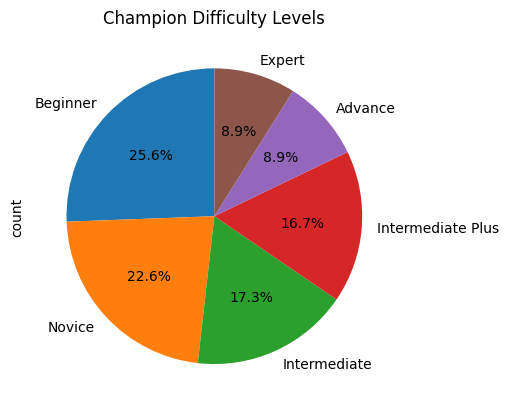

In [55]:
# Custom labels due to legend being too big and blocking pie chart
difficulty_custom_labels = ['Beginner', 'Novice', 'Intermediate', 'Intermediate Plus', 'Advance', 'Expert']

ax = champ_difficulty_count.plot.pie(
    y='Count',                     
    labels=difficulty_custom_labels,
    autopct='%1.1f%%',
    startangle=90,
    legend=False)

plt.title('Champion Difficulty Levels')

plt.show()

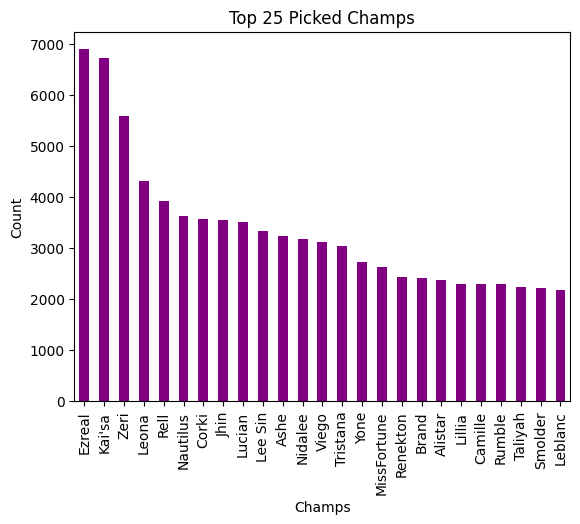

In [ ]:
# Top 25 Banned Champs
top25_match_champ_count = match_champ_count.sort_values(ascending=False).head(25)

top25_match_champ_count.plot(x='Name',y='Count', kind='bar', color='purple')

plt.title('Top 25 Picked')
plt.xlabel('Champs')
plt.ylabel('Count')

plt.show()

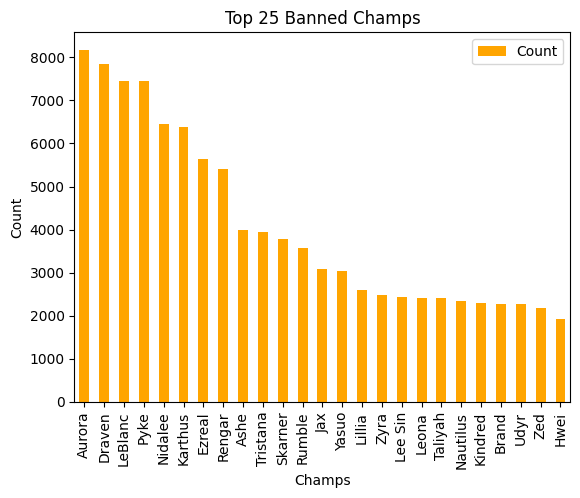

In [ ]:
# Top 25 Banned Champs
top25_banned = top50_merged_banned.sort_values(by='Count', ascending=False).head(25)

top25_banned.plot(x='Name',y='Count', kind='bar', color='orange')

plt.title('Top 25 Banned')
plt.xlabel('Champs')
plt.ylabel('Count')

plt.show()

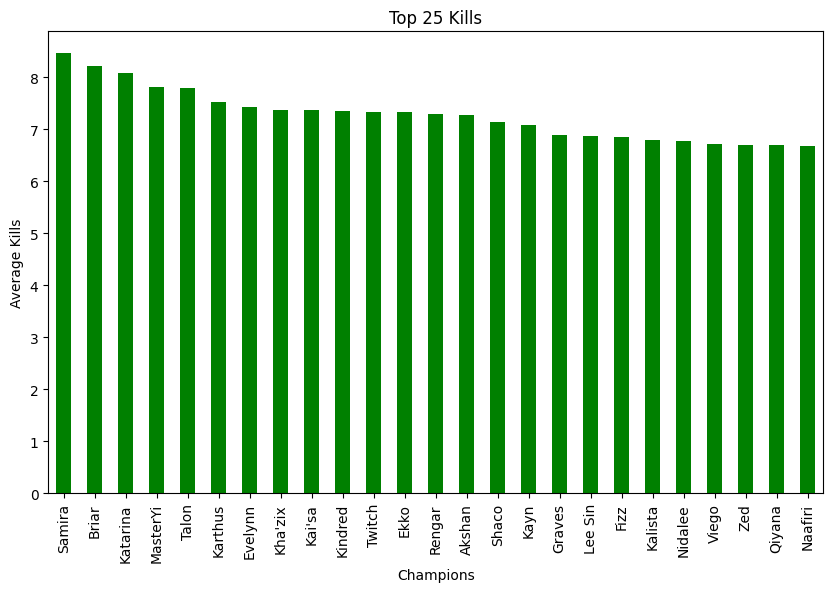

In [ ]:
# Top 25 Kills
merged_kills_mean = merged_kills_mean.sort_values(by='Kills(Mean)', ascending=False).head(25)

ax = merged_kills_mean.plot(y='Kills(Mean)', kind='bar', figsize=(10, 6), color='green')

plt.title('Top 25')
plt.xlabel('Champions')
plt.ylabel('Average Kills')

ax.get_legend().set_visible(False)

plt.show()

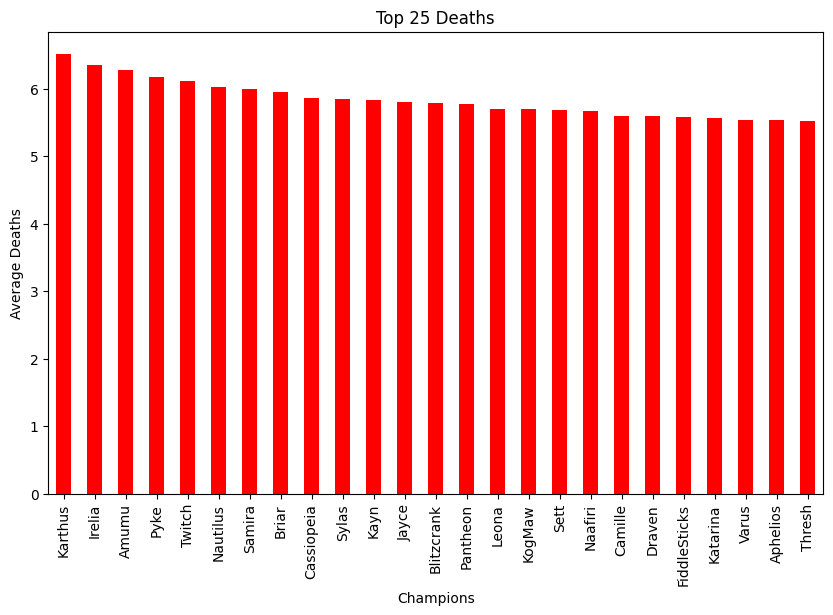

In [ ]:
# Top 25 Deaths
merged_deaths_mean = merged_deaths_mean.sort_values(by='Deaths(Mean)', ascending=False).head(25)

ax = merged_deaths_mean.plot(y='Deaths(Mean)', kind='bar', figsize=(10, 6), color='red')

plt.title('Top 25')
plt.xlabel('Champions')
plt.ylabel('Average Deaths')

ax.get_legend().set_visible(False)

plt.show()

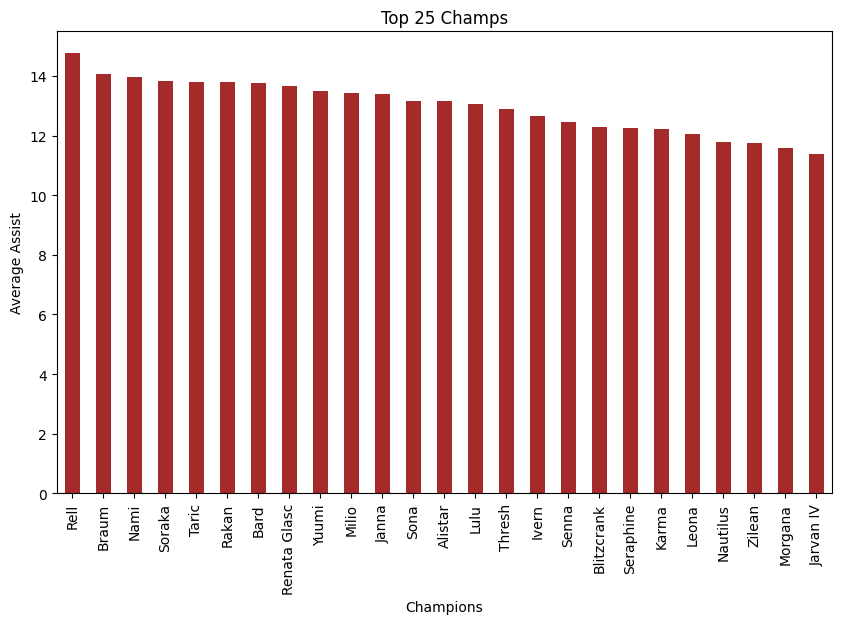

In [79]:
# Top 25 Assist Leaders
merged_assist_mean = merged_assist_mean.sort_values(by='Assist(Mean)', ascending=False).head(25)

ax = merged_assist_mean.plot(y='Assist(Mean)', kind='bar', figsize=(10, 6), color='brown')

plt.title('Top 25 Champs') 
plt.xlabel('Champions')   
plt.ylabel('Average Assist')

ax.get_legend().set_visible(False)

plt.show()

In [ ]:
blue_essence_count = champs['Blue Essence'].value_counts()

champs_rp_count = champs['RP'].value_counts

# Count the occurrences for each value in 'Blue Essence' and 'RP'

blue_essence_count = champs['Blue Essence'].value_counts()

champs_rp_count = champs['RP'].value_counts()

# Display the results

print(blue_essence_count)

print(champs_rp_count)

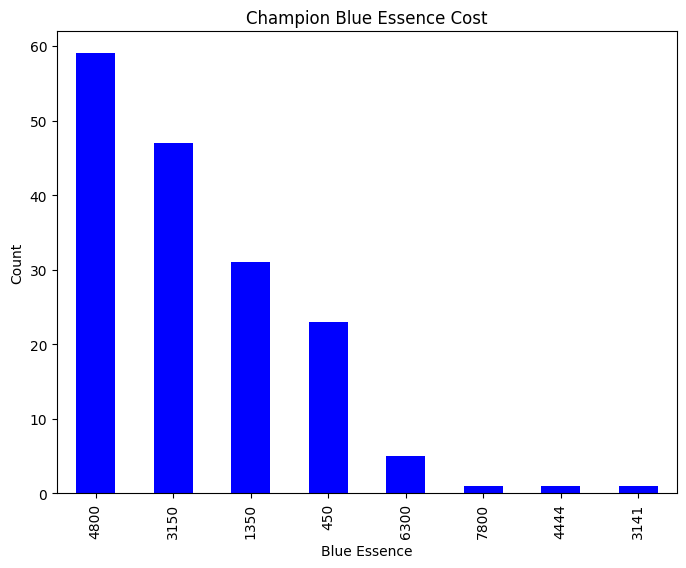

In [80]:
# Blue Essence Champ costs
ax = blue_essence_count.plot.bar(
    y='Count',
    x=blue_essence_count.index,
    legend=False,
    color='blue',
    figsize=(8, 6))

plt.title('Champion Blue Essence Cost')
plt.xlabel('Blue Essence')
plt.ylabel('Count')

plt.show()


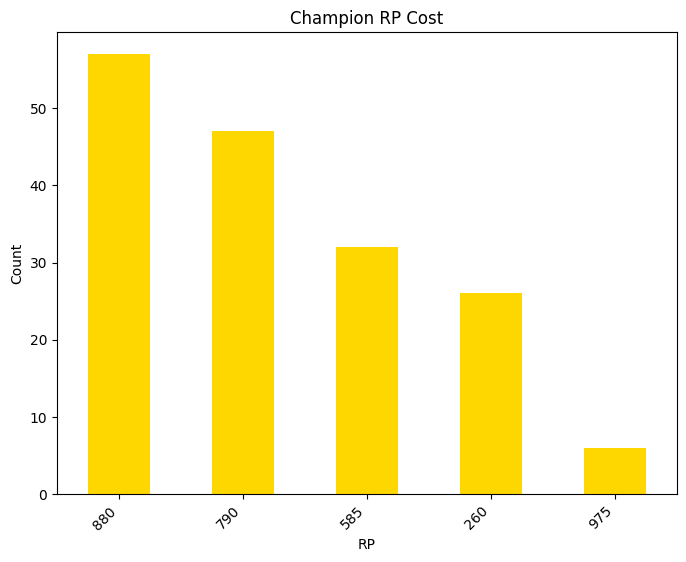

In [84]:
# RP champ cost
ax = champs_rp_count.plot.bar(
    y='Count',
    x=champs_rp_count.index,
    legend=False,
    color='gold',
    figsize=(8, 6)
)

plt.title('Champion RP Cost')
plt.xlabel('RP')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.show()